## This is the Baseline Models Comparison and Selection

# 1. Load Librares

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()

# 2. Load the Data

In [2]:
# load train1, test1, rul1 pickle to have a test

train1 = pd.read_pickle('data/train1.pkl')
test1 = pd.read_pickle('data/test1.pkl')
RUL1 = pd.read_pickle('data/RUL1.pkl')

In [3]:
train1[0:1]

id  cycle  setting1  setting2  setting3  sensor2  sensor3  sensor4  \
0   1      1   -0.0007   -0.0004     100.0   641.82   1589.7   1400.6   

   sensor7  sensor8 ...  sensor12  sensor13  sensor14  sensor15  sensor17  \
0   554.36  2388.06 ...    521.66   2388.02   8138.62    8.4195       392   

   sensor20  sensor21  rul  w1  w2  
0     39.06    23.419  191   0   0  

[1 rows x 22 columns]

In [4]:
test1[0:1]

id  cycle  setting1  setting2  setting3  sensor2  sensor3  sensor4  \
0   1      1    0.0023    0.0003     100.0   643.02  1585.29  1398.21   

   sensor7  sensor8 ...  sensor13  sensor14  sensor15  sensor17  sensor20  \
0    553.9  2388.04 ...   2388.03   8125.55    8.4052       392     38.86   

   sensor21  truth  rul  w1  w2  
0   23.3735    112  142   0   0  

[1 rows x 23 columns]

In [5]:
RUL1[0:1]

truth  id
0    112   1

# 3. Regression (for 'rul')
- linear regression
- LASSO
- ridge regression
- decision tree regression
- random forest regression

In [6]:
# train/test data definition

X_train, Y_train = train1.iloc[:,2:19], train1.iloc[:,19:20]
X_test, Y_test = test1.iloc[:,2:19], test1.iloc[:,20:21]

### 3.A Regression Support Functions

In [7]:
# define regression metrics calculation

from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
def get_regression_metrics(model_name, model, x_train, y_train, x_test, y_test):
    '''Calculate regression performance metrics
    model_name (str):      model name
    model (clf):           model
    x_train:               training set
    y_train:               training label
    x_test:                testing set
    y_test (series):       testing label
    y_pred (series):       predict value will be generated within function
    returns:               combined metrics in a dataframe
    '''
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    regression_metrics = {
        'explained variance':      metrics.explained_variance_score(y_test, y_pred),
        'root mean squared error': metrics.mean_squared_error(y_test, y_pred)**0.5,
        'mean absolute error':     metrics.mean_absolute_error(y_test, y_pred),
        'r2 score':                metrics.r2_score(y_test, y_pred)    }
    df_regression_metrics = pd.DataFrame.from_dict(regression_metrics, orient='index')
    df_regression_metrics.columns = [model_name]
    return df_regression_metrics

In [8]:
# define feature importance plot

def plot_feature_importance(model_name, model, x_train, y_train):
    '''Plot regression feature importance (coefficients weights)
    model (str):           model name
    weights (array):       coefficient weights
    f_names (list):        feature names
    weight_type (str):     'c' for coefficient weights, o.w. is feature importance
    returns:               plt of feature importance (coefficient weights)
    '''
    model.fit(x_train, y_train.values.ravel())
    if model_name == 'DecisionTr' or model_name == 'RandomFore':
        W = pd.DataFrame({'weights': model.feature_importances_}, x_train.columns)
    else:
        W = pd.DataFrame({'weights': model.coef_}, x_train.columns)        
    W.sort_values(by='weights', ascending=True).plot(kind='barh', color='r', figsize=(8, 3))
    label = ' feature importance' if (model_name == 'DecisionTr' or model_name == 'RandomFore') else ' coefficients'
    plt.xlabel(model_name + label)
    plt.grid(color='gray', linewidth=0.15, linestyle='-.')
    plt.show()

### 3.B Load Models

In [9]:
# linear regression
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()

# LASSO regression
lasso_regr = linear_model.Lasso(alpha=0.001)

# ridge regression
rd_regr = linear_model.Ridge(alpha=0.01)

# decision tree regression
from sklearn.tree import DecisionTreeRegressor
dtr_regr = DecisionTreeRegressor(max_depth=7, random_state=123)

# random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1)

# list of (models (clf), model names (str))
list_reg_model_name = [(str(m).split('(')[0][0:10], m) for m in [lin_regr, lasso_regr, rd_regr, dtr_regr, rf_regr]]

### 3.C Compare Model Performance

In [10]:
# compare performance metrics

newDF = pd.DataFrame(index=['root mean squared error','mean absolute error','explained variance','r2 score'])
for name, model in list_reg_model_name:
    newDF = pd.concat([newDF, get_regression_metrics(name, model, X_train, Y_train, X_test, Y_test)], axis=1)
newDF

LinearRegr      Lasso      Ridge  DecisionTr  \
explained variance         0.337138   0.337516   0.337424    0.339755   
mean absolute error       37.163542  37.151975  37.154635   36.353867   
r2 score                   0.327030   0.327385   0.327301    0.335055   
root mean squared error   48.382349  48.369585  48.372582   48.093018   

                         RandomFore  
explained variance         0.351758  
mean absolute error       36.766395  
r2 score                   0.330541  
root mean squared error   48.255980

### 3.D Feature Importance Review

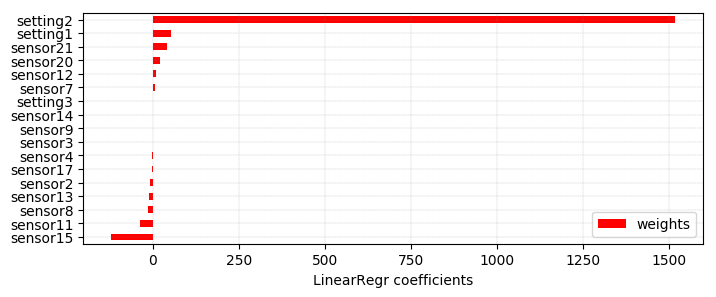

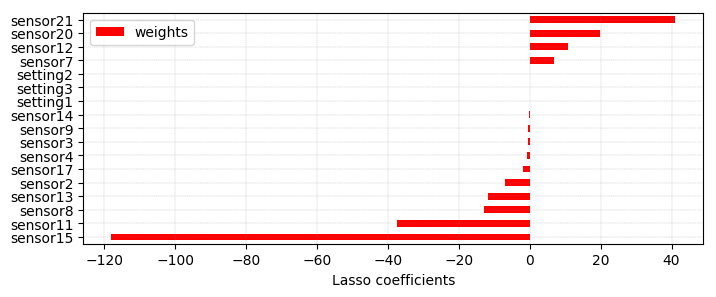

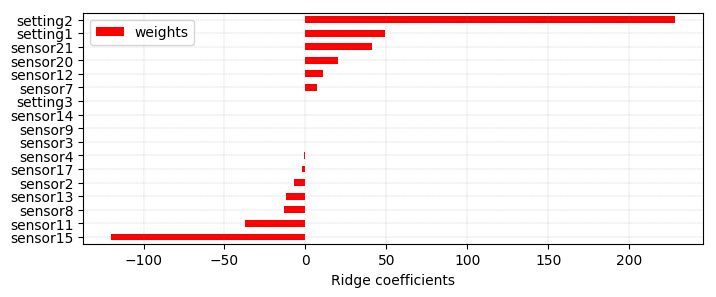

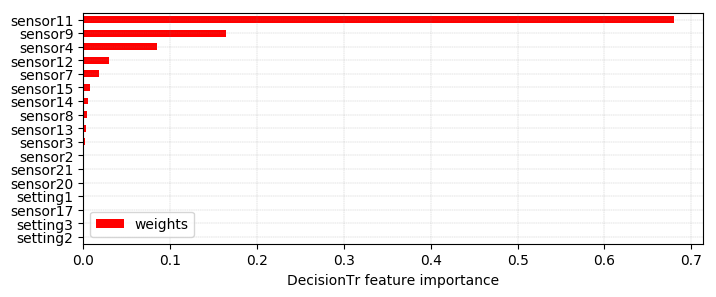

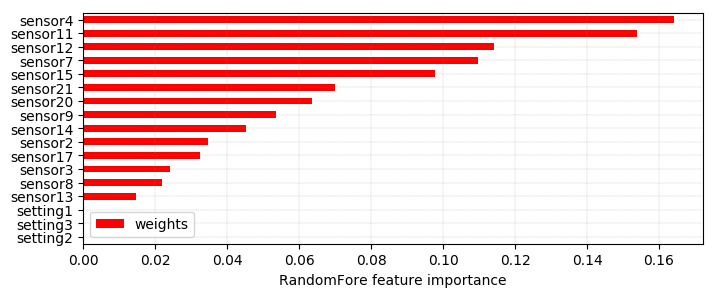

[None, None, None, None, None]

In [11]:
# Review all feature importance or coefficiency

[plot_feature_importance(name, model, X_train, Y_train) for name, model in list_reg_model_name]

### 3.E Regression Baseline Summary
- Using default features, model errors are high and performance not good
- Insights:
    - Understood the regression model performance under raw data
    - Understood the feature importance under each model
    - Gain a baseline though its performance is poor, but leave room for improvement
- Next steps:
    - Feature engineering
    - Hyper-parameter tuning (Grid search)
    - Based on these to refine the model and select best performer

# 4. Binary Classifications
- logistic regression
- decision tree
- random forest
- support vector machine
- k nearest neighbor

In [12]:
# train/test data definition for binary

X_train_b, Y_train_b = train1.iloc[:,2:19], train1.iloc[:,20:21]
X_test_b, Y_test_b = test1.iloc[:,2:19], test1.iloc[:,21:22]

### 4.A Binary Classification Support Functions

In [13]:
# define binary metrics calculation

from sklearn import metrics
def get_binary_metrics(model_name, model, x_train, y_train, x_test, y_test):
    '''Calculate binary classification performance metrics
    model_name (str):      model name
    model (clf):           model
    x_train:               training set
    y_train:               training label
    x_test:                testing set
    y_test (series):       testing label
    y_pred (series):       predict value will be generated within function
    returns:               combined metrics in a dataframe
    '''
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    binary_metrics = {
        'accuracy':                metrics.accuracy_score(y_test, y_pred),
        'Precision':               metrics.precision_score(y_test, y_pred),
        'Recall':                  metrics.recall_score(y_test, y_pred),
        'f1 score':                metrics.f1_score(y_test, y_pred)   }
    df_binary_metrics = pd.DataFrame.from_dict(binary_metrics, orient='index')
    df_binary_metrics.columns = [model_name]
    return df_binary_metrics

### 4.B Load Models

In [14]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf_lg_b = LogisticRegression(random_state=123)

# decision trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf_dt_b = DecisionTreeClassifier(random_state=123)

# random forest
from sklearn.ensemble import RandomForestClassifier
clf_rf_b = RandomForestClassifier(n_estimators=50, random_state=123)

# support vector machine
from sklearn.svm import SVC
clf_svc_b = SVC(kernel='rbf', random_state=123)

# k nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
clf_knn_b = KNeighborsClassifier(n_jobs=-1)

# list of (models (clf), model names (str))
list_bin_model_name = [(str(m).split('(')[0][0:10], m) for m in [clf_lg_b, clf_dt_b, clf_rf_b, clf_svc_b, clf_knn_b]]

### 4.C Compare Model Performance

In [19]:
# compare performance metrics

newDF_bin = pd.DataFrame(index=['accuracy','Precision','Recall', 'f1 score'])
for name, model in list_bin_model_name:
    newDF_bin = pd.concat([newDF_bin, get_binary_metrics(name, model, X_train_b, Y_train_b, X_test_b, Y_test_b)], axis=1)
newDF_bin

LogisticRe  DecisionTr  RandomFore       SVC  KNeighbors
accuracy     0.983201    0.976405    0.986714  0.983735    0.981139
Precision    0.745614    0.532764    0.829167  0.753191    0.657993
Recall       0.512048    0.563253    0.599398  0.533133    0.533133
f1 score     0.607143    0.547584    0.695804  0.624339    0.589018

### 4.E Binary Classification Summary
- Accuracy for binary classification is better than regression
- Insights:
    - RandomForest model looks better performance
- Next Step:
    - Feature Engineering
    - hyper-parameter tuning (Grid search)

# 5. Multi-Class Classifications
- logistic regression
- decision tree
- random forest
- support vector machine (linear svc)
- k nearest neigbor (knn)
- neural network (MLP multi-layer perceptron)

In [22]:
# train/test data definition for multi-class

X_train_m, Y_train_m = train1.iloc[:,2:19], train1.iloc[:,21:22]
X_test_m, Y_test_m = test1.iloc[:,2:19], test1.iloc[:,22:23]

### 5.A Multi-Class Classification Support Functions

In [29]:
# define multi-class metrics calculation

from sklearn import metrics
def get_multi_metrics(model_name, model, x_train, y_train, x_test, y_test):
    '''Calculate multi-class classification performance metrics
    model_name (str):      model name
    model (clf):           model
    x_train:               training set
    y_train:               training label
    x_test:                testing set
    y_test (series):       testing label
    y_pred (series):       predict value will be generated within function
    returns:               combined metrics in a dataframe
    '''
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    multi_metrics = {
        'accuracy':                metrics.accuracy_score(y_test, y_pred),
        'macro F1':                metrics.f1_score(y_test, y_pred, average='macro'),
        'micro F1':                metrics.f1_score(y_test, y_pred, average='micro'),
        'macro Precision':         metrics.precision_score(y_test, y_pred,  average='macro'),
        'micro Precision':         metrics.precision_score(y_test, y_pred,  average='micro'),
        'macro Recall':            metrics.recall_score(y_test, y_pred,  average='macro'),
        'micro Recall':            metrics.recall_score(y_test, y_pred,  average='micro')   }
    df_multi_metrics = pd.DataFrame.from_dict(multi_metrics, orient='index')
    df_multi_metrics.columns = [model_name]
    return df_multi_metrics

### 5.B Load Models

In [42]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf_lg_m = LogisticRegression(random_state=123)

# decision trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf_dt_m = DecisionTreeClassifier(random_state=123)

# random forest
from sklearn.ensemble import RandomForestClassifier
clf_rf_m = RandomForestClassifier(n_estimators=50, random_state=123)

# support vector machine
from sklearn.svm import SVC
clf_svc_m = SVC(kernel='rbf', random_state=123)

# k nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
clf_knn_m = KNeighborsClassifier(n_jobs=-1)

# neural network
from sklearn.neural_network import MLPClassifier
clf_nn_m = MLPClassifier(random_state=123)

# list of (models (clf), model names (str))
list_multi_model_name = [(str(m).split('(')[0][0:10], m) for m in [clf_lg_m, clf_dt_m, clf_rf_m, clf_svc_m, clf_knn_m, clf_nn_m]]

### 5.C Compare Model Performance

In [43]:
# compare performance metrics
# too few data caused some warnings, ignore it

newDF_mul = pd.DataFrame(index=['accuracy','macro F1','micro F1','macro Precision','micro Precision','macro Recall','micro Recall'])
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, model in list_multi_model_name:
        newDF_mul = pd.concat([newDF_mul, get_multi_metrics(name, model, X_train_m, Y_train_m, X_test_m, Y_test_m)], axis=1)
newDF_mul

LogisticRe  DecisionTr  RandomFore       SVC  KNeighbors  \
accuracy           0.976710    0.975489    0.983201  0.978619    0.977474   
macro F1           0.489040    0.633160    0.718793  0.591133    0.606923   
macro Precision    0.778457    0.615023    0.788519  0.657734    0.645569   
macro Recall       0.567474    0.665344    0.670847  0.569406    0.587005   
micro F1           0.976710    0.975489    0.983201  0.978619    0.977474   
micro Precision    0.976710    0.975489    0.983201  0.978619    0.977474   
micro Recall       0.976710    0.975489    0.983201  0.978619    0.977474   

                 MLPClassif  
accuracy           0.974649  
macro F1           0.329054  
macro Precision    0.324883  
macro Recall       0.333333  
micro F1           0.974649  
micro Precision    0.974649  
micro Recall       0.974649

### 5.D Multi-Class Classification Insights
- On raw data, Random forest performs strong among all classifiers
- Next step:
    - Feature engineering
    - hyper-parameter tuning (Grid search)
    - Compare the performance again